# Precios en tiempos de cólera

#### El salario cubano frente al costo de la canasta básica en MiPymes minoristas.

En Cuba, el **precio** es sinónimo de decisión: determina qué puede comprar una persona con su salario en un mercado donde los precios suben sin límite. Entonces surge la pregunta: **¿Puede un cubano de la clase trabajadora adquirir los alimentos básicos?**.

## Fuentes de datos

Para el desarrollo del análisis se realizó la recopilación de información de **30 MiPymes minoristas**, considerando un conjunto mínimo de 10 productos de consumo básico (alimentos). A partir de esta información se obtuvieron precios reales del mercado local, como fuente principal.

### Bibliotecas:

In [1]:
from m_tools import *
from m_normalize import *
from m_charts import *
from m_charts2 import *

In [2]:
print(f'Cantidad de MiPymes: {data_count}')

Cantidad de MiPymes: 30


## Canasta:

In [3]:
Basket('basket.json')

## Chart 1: Precio promedio por producto

Aqui se puede visualizar el **precio promedio** de los alimentos recopilados en distintas MiPymes. Cada barra representa el **valor medio** al que un consumidor puede encontrar en un mercado minorista.

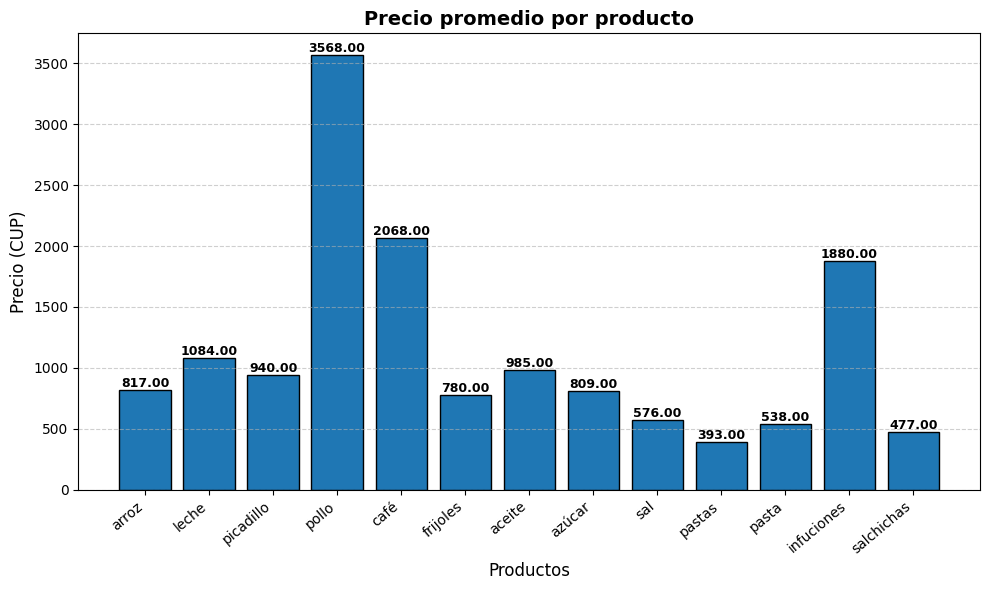

In [4]:
ChartAverageProductsD()

El **precio promedio** se utiliza como una medida para facilitar la comparación de productos.

## Chart 2: Variabilidad de precios

Podemos visualizar la **distribución de los precios** de cada producto. A diferencia de la gráfica anterior, no se utiliza un valor único, sino se visualiza como se **concentran** y **dispersan** los precios.

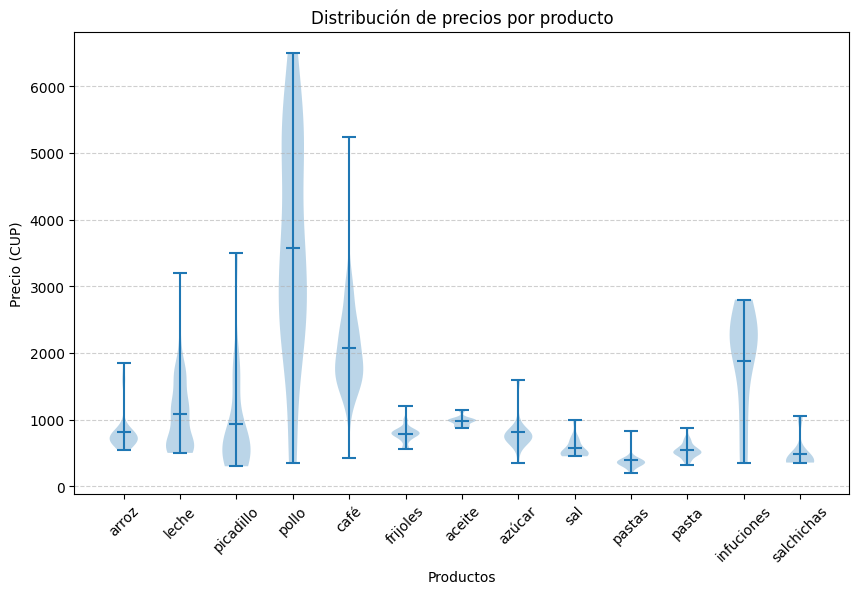

In [5]:
ChartVariabilityPrices()

Cada violín muestra la densidad de precios para un producto en específico, así no solo se analizan valores centrales. Analiza la frecuencia relativa de precios **altos** y **bajos**.

## Chart 3.1: Comparación de Canasta/Salario

Aquí se compara el precio total de la **canasta básica** con el **salario promedio** como evidencia de una **brecha económica** entre el ingreso del trabajador y el costo alimenticio.

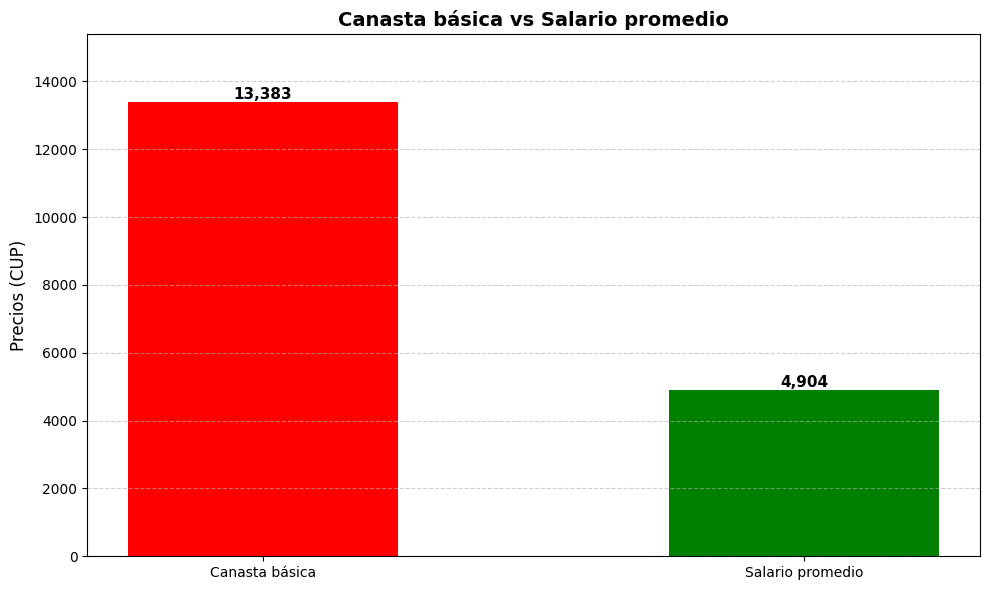

In [6]:
ChartCostBasketD()

## Chart 3.2: Comparación de Canasta/Salario

Aquí se compara el **salario promedio mensual** de un cubano de clase trabajadora con el **costo estimado** de cada producto. El **salario promedio mensual** se utiliza como un límite sobre si se puede adquirir 'x' producto.

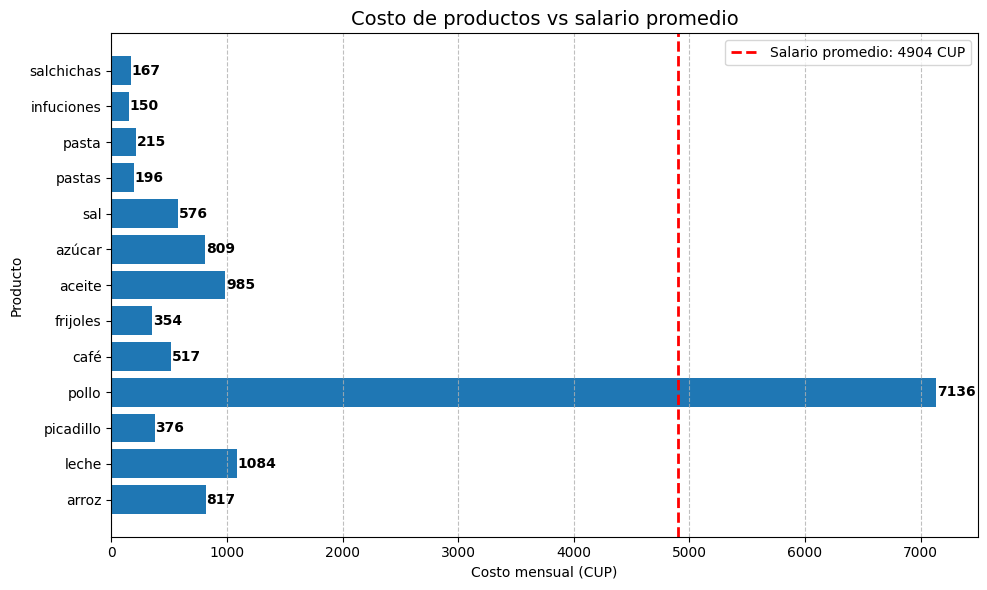

In [7]:
ChartCostBasket2D(1)

Se calculó la **canasta básica** a partir del precio promedio y su gramaje. Y también se utilizó el **salario promedio mensual** como una referencia del poder adquisitivo. No se analizan los **salarios individuales** ni **ocupaciones**.

## Chart 4: Cantidad accesible

Se muestra en la gráfica la **cantidad (unidad) de productos** comprables con el **salario promedio**.

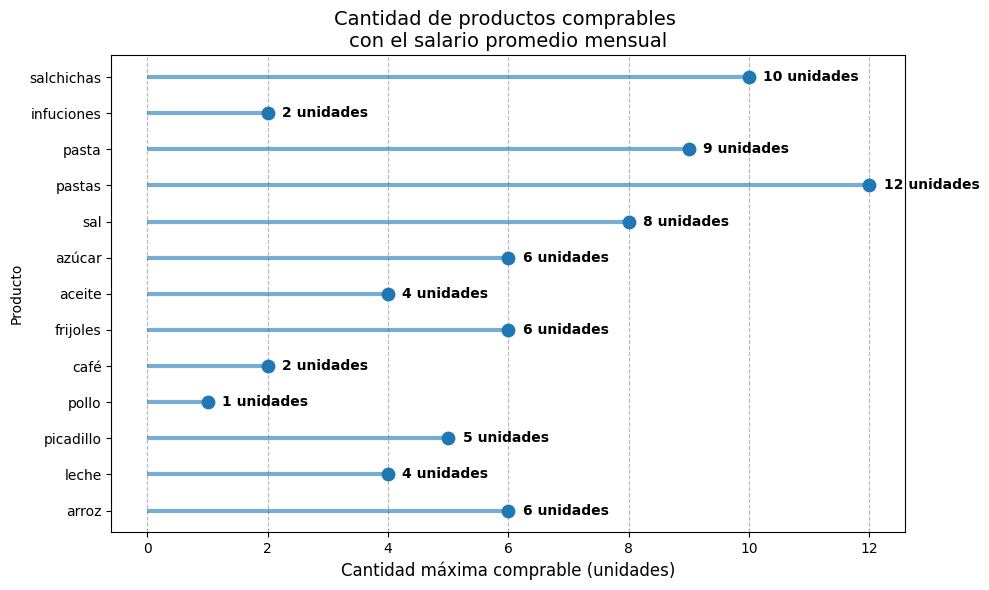

In [8]:
ChartMaxUnitsPlotD(1)

## Chart 5: Días necesarios

Aquí se convierten los precios de los productos en **días laborales** necesarios para adquirir los productos.

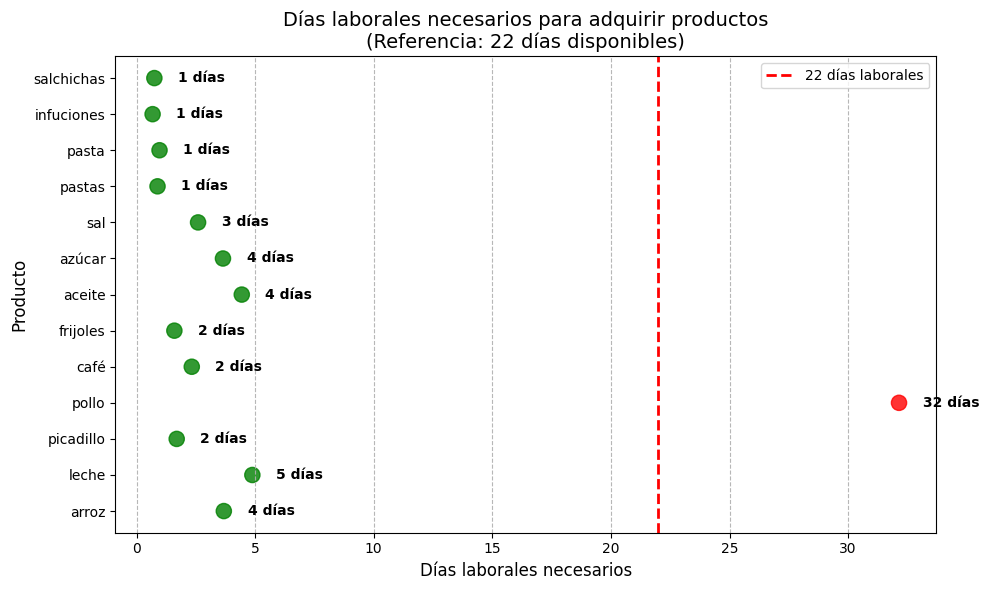

In [9]:
ChartNecesaryDaysPlotD(22)

### Metodología:

* Se basa en **salario promedio**.
* Se utiliza **gramaje promedio** de cada producto.

Se evidencia que el **salario promedio** cubano no es suficiente para adquirir productos esenciales (alimentos), y que algunos requieren varios días de trabajo para ser adquiridos, sin contar otros gastos como:
- Electricidad
- Gas
- Agua
- Transporte
- Higiene
- Telefonía